In [1]:
# Let's use machine learning for Gold Price Prediction with Python.
# We are going to use the data from Kaggle page (https://www.kaggle.com/altruistdelhite04/gold-price-data/).

In [2]:
# let’s import the libraries we are going to use for read and processing the data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
# Loading the dataset using pandas
df = pd.read_csv('gld_price_data.csv')

In [4]:
# Summarize the Dataset
print('df')
print('Head')
print(df.head())
print('Tail')
print(df.tail())
print('Shape:', df.shape)

df
Head
       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099
Tail
           Date          SPX         GLD      USO      SLV   EUR/USD
2285   5/8/2018  2671.919922  124.589996  14.0600  15.5100  1.186789
2286   5/9/2018  2697.790039  124.330002  14.3700  15.5300  1.184722
2287  5/10/2018  2723.070068  125.180000  14.4100  15.7400  1.191753
2288  5/14/2018  2730.129883  124.489998  14.3800  15.5600  1.193118
2289  5/16/2018  2725.780029  122.543800  14.4058  15.4542  1.182033
Shape: (2290, 6)


In [5]:
# It contains 5 columns which are numerical in datatype and one column in Date format. 
# Clearly the data shows value of the variables SPX,GLD,USO,SLV,EUR/USD against the dates in the date column.
# The GLD column represent the gold price and this is what we are going to predict

# We see if there is missing data
print("Missing data")
print(df.isnull().sum())
# In percentage
print("Missing data in percentage")
print(round(df.isnull().sum()/df.shape[0]*100,2))

Missing data
Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64
Missing data in percentage
Date       0.0
SPX        0.0
GLD        0.0
USO        0.0
SLV        0.0
EUR/USD    0.0
dtype: float64


In [6]:
# we can see that there is no data lost

# Let's know the type of data
df.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [7]:
# Statistical analysis of the data
# count: number of non-null data in column
# mean: column mean value
# std: column desviation standart 
# min: minimum column value
# 25 %: percentile
# 50 %: percentile
# 75 %: percentile
# max: maximum column value
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


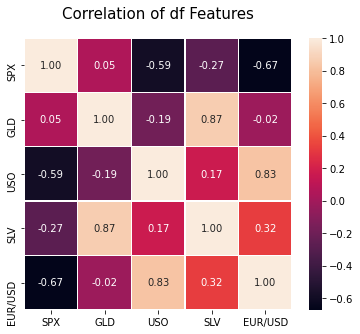

In [8]:
# Correlation

corr = df.corr()

plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)
plt.savefig('Correlation.jpg')
plt.show()

In [9]:
# Correlation values of GLD
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


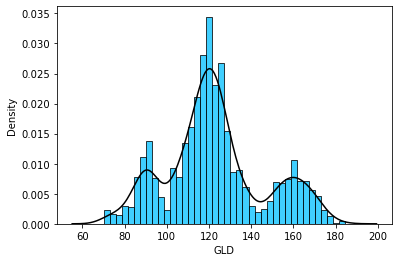

In [15]:
# Distribution of the GLD Price
#sns.distplot(df['GLD'],color='green', kde_kws={"color": "k"})
sns.histplot(df['GLD'], color='deepskyblue', stat='density', bins = 40)
sns.kdeplot(df['GLD'], color='black')
plt.savefig('DisplotGLD.jpg')

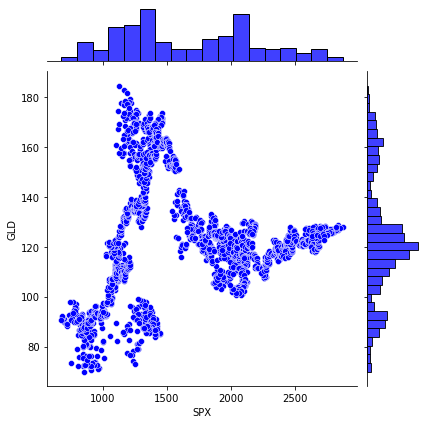

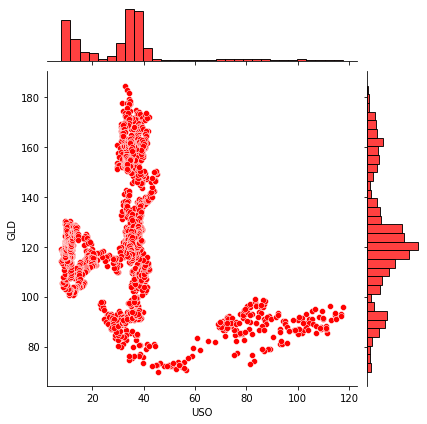

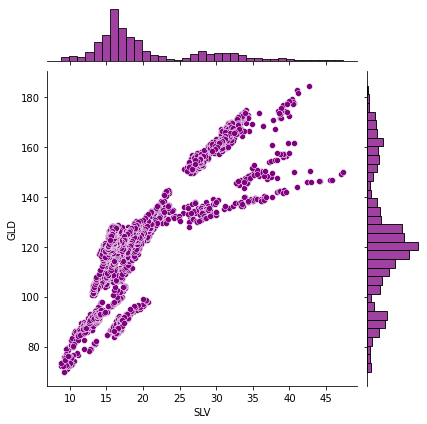

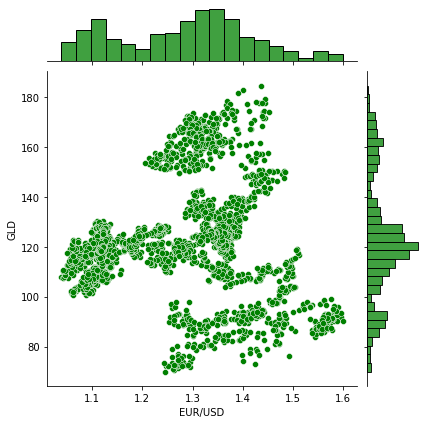

In [16]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'blue')
plt.savefig('Relation_GLD-SPX.jpg')

sns.jointplot(x =df['USO'], y = df['GLD'], color = 'red')
plt.savefig('Relation_GLD-USO.jpg')

sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'purple')
plt.savefig('Relation_GLD-SLV.jpg')

sns.jointplot(x =df['EUR/USD'], y = df['GLD'], color = 'green')
plt.savefig('Relation_GLD-EURUSD.jpg')

In [17]:
# Split the Features and Target
X = df.drop(['Date','GLD'],axis=1)
Y = df['GLD']

In [18]:
# Create Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

RF = RandomForestRegressor(n_estimators=100)
RF.fit(X_train,Y_train)

test_data_pred = RF.predict(X_test)

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_pred)
print("R squared error : ", error_score)

R squared error :  0.9889806532054267


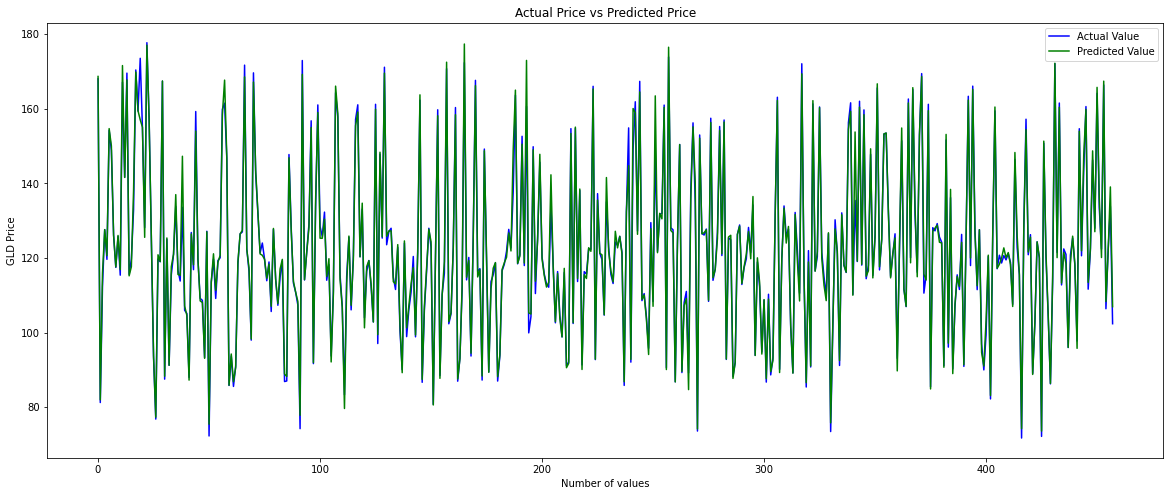

In [21]:
# Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)
plt.figure(figsize = (20,8))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.savefig('ActualvsPredicted.jpg')
plt.show()